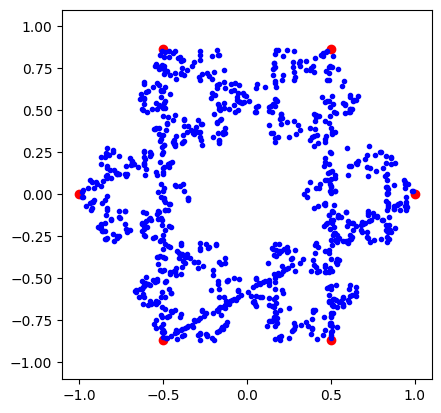

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Function to generate random points on the unit circle for 'n' vertices
def generate_vertices(n):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    vertices = [(np.cos(angle), np.sin(angle)) for angle in angles]
    return vertices

# Function to perform the chaos game for given 'n' and 'iterations'
def chaos_game(n, iterations):
    vertices = generate_vertices(n)
    current_point = random.choice(vertices)
    previous_vertex = current_point
    points = []

    for _ in range(iterations):
        # Select a random vertex
        next_vertex = random.choice(vertices)

        # Move halfway towards the selected vertex
        current_point = (
            (current_point[0] * 1/3 + next_vertex[0] * 2 / 3),
            (current_point[1] * 1/3 + next_vertex[1] * 2 / 3)
        )
        points.append(current_point)

    return points

# Function to update the animation frame
def update(frame):
    ax.clear()
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.plot([v[0] for v in vertices], [v[1] for v in vertices], 'ro')  # Plot vertices
    ax.plot([p[0] for p in points[:frame]], [p[1] for p in points[:frame]], 'b.')  # Plot chaos game points

# Get user input for the number of vertices and iterations
n = int(input("Enter the number of vertices: "))
iterations = int(input("Enter the number of iterations: "))

# Create the figure and axis
fig, ax = plt.subplots()

# Perform the chaos game
vertices = generate_vertices(n)
points = chaos_game(n, iterations)

# Create the animation
ani = FuncAnimation(fig, update, frames=len(points), interval=0.01)
ani.save('chaos_game_4.gif', writer='pillow')
# Show the animation
plt.show()